In [8]:
# Import necessary libraries for regression analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
# Load the CSV file
file_path = '/content/sample_data/load_duration_data_unique.csv'
data = pd.read_csv(file_path)

# Split data into features (X) and target (y)
X = data[['load']]
y = data['duration']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models to test
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

# Fit each model to the training data
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Make predictions with each model on the test set
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate each model's performance
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Display the performance of each model
mse_linear, r2_linear, mse_ridge, r2_ridge, mse_lasso, r2_lasso


(15704.25878160603,
 0.9988684616775462,
 15704.25967370841,
 0.9988684616132676,
 15704.261159332604,
 0.998868461506224)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


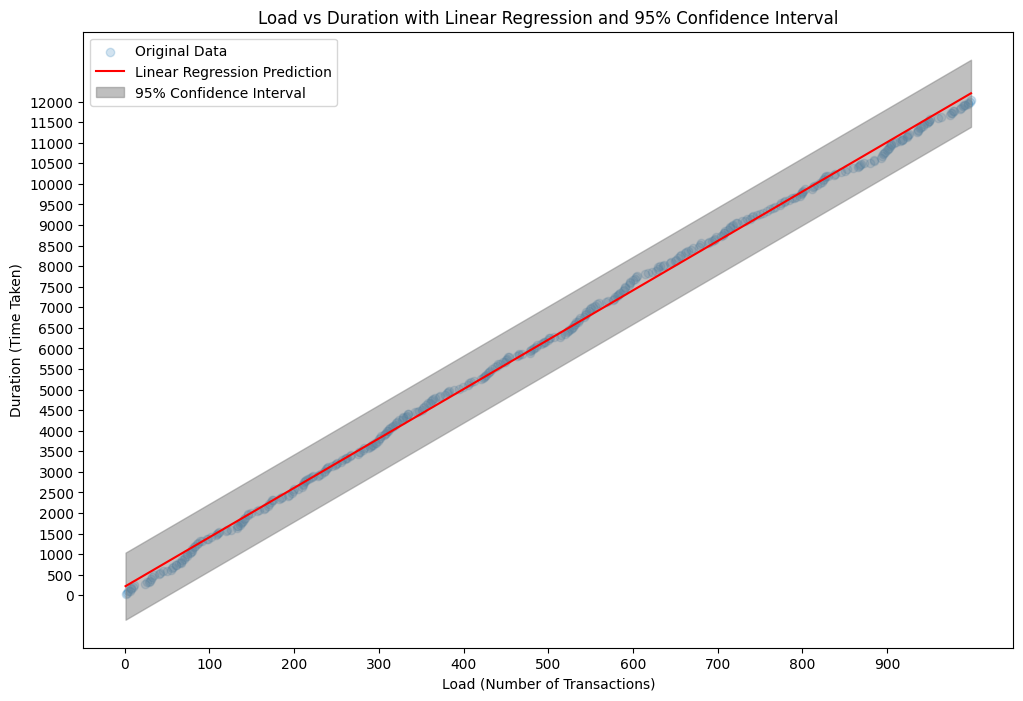

In [10]:
# Generate 100 more predictions using the linear regression model
X_new = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred_new = linear_model.predict(X_new)

# Calculate the confidence interval for predictions
# 95% confidence interval
confidence_interval = 1.96 * np.std(y_pred_linear) / np.sqrt(len(X_test))
lower_bound = y_pred_new - confidence_interval
upper_bound = y_pred_new + confidence_interval

# Plot the original data, predicted values, and 95% confidence interval
plt.figure(figsize=(12, 8))

# Original data
plt.scatter(data['load'], data['duration'], label='Original Data', alpha=0.2)

# Predicted values
plt.plot(X_new, y_pred_new, color='red', label='Linear Regression Prediction')

# Confidence interval
plt.fill_between(X_new.flatten(), lower_bound, upper_bound, color='gray', alpha=0.5, label='95% Confidence Interval')
# Set ticks for both axes
plt.xticks(np.arange(0, data['load'].max() + 1, 100))  # Load ticks every 100
plt.yticks(np.arange(0, data['duration'].max() + 1, 500))  # Duration ticks every 500

# Titles and labels
plt.title('Load vs Duration with Linear Regression and 95% Confidence Interval')
plt.xlabel('Load (Number of Transactions)')
plt.ylabel('Duration (Time Taken)')
plt.legend()

# Display the updated plot
plt.show()
